### BTC-USD correlation to US stocks, bonds, minerals

In [1]:
import numpy as np
import pandas as pd
import yfinance as yf

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import time

In [25]:
# get historical daily price change.
hist_list = []
for symbol in ['GLD','SLV','TIPS','LQD','IWM','SPY','QQQ','SQ','TSLA','BTC-USD']:
    tick = yf.Ticker(symbol)
    df = tick.history(period="max")
    df = df[['Close']]
    df.Close = df.Close.pct_change(1)
    df = df.dropna()
    df=df.rename(columns={'Close':symbol})
    hist_list.append(df)
df = hist_list[-1]
rest = hist_list[:-1]

In [26]:
for x in rest:
    df = pd.merge(df,x,how='left',left_index=True,right_index=True)

In [27]:
df=df.dropna()

In [28]:
df.shape,np.min(df.index),np.max(df.index)

((1311, 10),
 Timestamp('2015-11-20 00:00:00'),
 Timestamp('2021-02-12 00:00:00'))

In [29]:
df=df.iloc[-126:,:]
print(df.shape,np.min(df.index),np.max(df.index))

(126, 10) 2020-08-10 00:00:00 2021-02-12 00:00:00


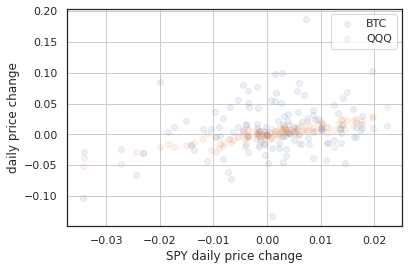

In [30]:
plt.scatter(df['SPY'],df['BTC-USD'],alpha=0.1,label='BTC')
plt.scatter(df['SPY'],df['QQQ'],alpha=0.1,label='QQQ')
plt.xlabel('SPY daily price change')
plt.ylabel('daily price change')
plt.grid(True)
plt.legend()

Correlation coefficient of daily price return between 10 assets (n=126)
date range from 2020-08-10 to 2021-02-12


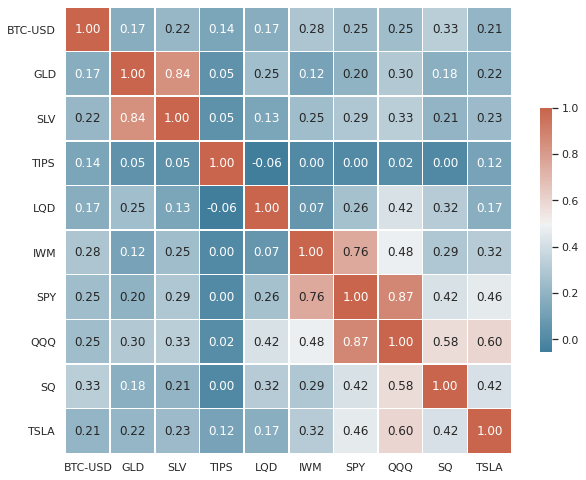

In [31]:
sns.set_theme(style="white")

corr = df.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(10,9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)
# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, cmap=cmap, vmax=1., center=0.5, #mask=mask,
            square=True, linewidths=.5, cbar_kws={"shrink": .5},
            annot=True, fmt="1.2f")

plt.yticks(rotation=0)
print(f'Correlation coefficient of daily price return between 10 assets (n={df.shape[0]})')
print(f'date range from {df.index[0].date()} to {df.index[-1].date()}')

In [32]:
df.corr()

,BTC-USD,GLD,SLV,TIPS,LQD,IWM,SPY,QQQ,SQ,TSLA
BTC-USD,1.000000,0.171063,0.220770,0.135767,0.170739,0.283661,0.248320,0.245958,0.330561,0.213129
GLD,0.171063,1.000000,0.843618,0.047926,0.248738,0.122970,0.196038,0.302648,0.180833,0.218020
SLV,0.220770,0.843618,1.000000,0.045622,0.134804,0.246216,0.293293,0.331178,0.208565,0.232289
TIPS,0.135767,0.047926,0.045622,1.000000,-0.056743,0.002869,0.004338,0.018441,0.000657,0.124112
LQD,0.170739,0.248738,0.134804,-0.056743,1.000000,0.065066,0.262142,0.420176,0.316339,0.174924
IWM,0.283661,0.122970,0.246216,0.002869,0.065066,1.000000,0.759150,0.484958,0.294642,0.316605
SPY,0.248320,0.196038,0.293293,0.004338,0.262142,0.759150,1.000000,0.872066,0.418479,0.459786
QQQ,0.245958,0.302648,0.331178,0.018441,0.420176,0.484958,0.872066,1.000000,0.576464,0.600949
SQ,0.330561,0.180833,0.208565,0.000657,0.316339,0.294642,0.418479,0.576464,1.000000,0.416666
TSLA,0.213129,0.218020,0.232289,0.124112,0.174924,0.316605,0.459786,0.600949,0.416666,1.000000
